# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi ogólne:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> ` # YOUR CODE HERE`<br/> ` raise NotImplementedError()`<br/> Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, mieć nadane tytuły, opisane osie oraz odpowiednio dobrany rozmiar, wielkość punktów i grubość linii. Proporcje osi wykresów przedstawiających rozkłady punktów powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autora rozwiązania (`NAME` - imię, nazwisko i numer indeksu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$. 

In [ ]:
NAME = ""

---

## Kolokwium zaliczeniowe (1 termin, zestaw 3)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import libpysal as ps
import pointpats as pp

import os
os.environ["OMP_NUM_THREADS"] = '1'
from sklearn.cluster import KMeans

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Zadanie 1: Badanie intensywności procesu punktowego metodą szacowania lokalnego (9 pkt)

Przygotuj funkcję `intensity_on_subregions()`, która będzie obliczać intensywność procesu punktowego w obrębie prostokątnych podobszarów zgodnie ze schematem omawianym podczas ćwiczeń oraz opisem podanym w docstring funkcji.

Następnie wykorzystaj przygotowaną funkcję do zbadania intensywności rozkładu punktów z pliku points_1.csv dla zakresu współrzędnych x [-10, 20] i y [0, 15]. Ustaw podział obszaru na 60 podobszarów wzdłuż osi $x$ i 30 podobszarów wzdłuż osi $y$.

Przedstaw wyniki analizy graficznie w postaci histogramu dwuwymiarowego z nałożonym na niego rozkładem punktów.

#### a) Przygotowanie funkcji

In [3]:
def intensity_on_subregions(points, bins, x_lim, y_lim):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    bins: list
        Lista określająca liczbę podobszarów w poziomie i pionie.
        Przykład: [10, 10]
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    intensity_data: list
        Lista zawierająca trzy macierze:
        - 1D ze współrzędnymi krawędzi podobszarów na osi X,
        - 1D ze współrzędnymi krawędzi podobszarów na osi Y,
        - 2D z wartością intensywności przypisaną do każdego z podobszarów.
        Na przykład: [array([0, 1, 2]), array([0, 1, 2]), array([[9, 12], [13, 8]])]
    """
    # YOUR CODE HERE
    X = np.linspace(x_lim[0],x_lim[1], bins[0]+1)
    Y = np.linspace(y_lim[0],y_lim[1], bins[1]+1)
    H,X,Y = np.histogram2d(x = points["X"], y = points["Y"], bins=(X,Y))
    H = H/(X[1]-X[0])/(Y[1]-Y[0])
    return [X,Y,H]

#### b) Wygenerowanie i wizualicacja procesu

Text(0, 0.5, 'Y')

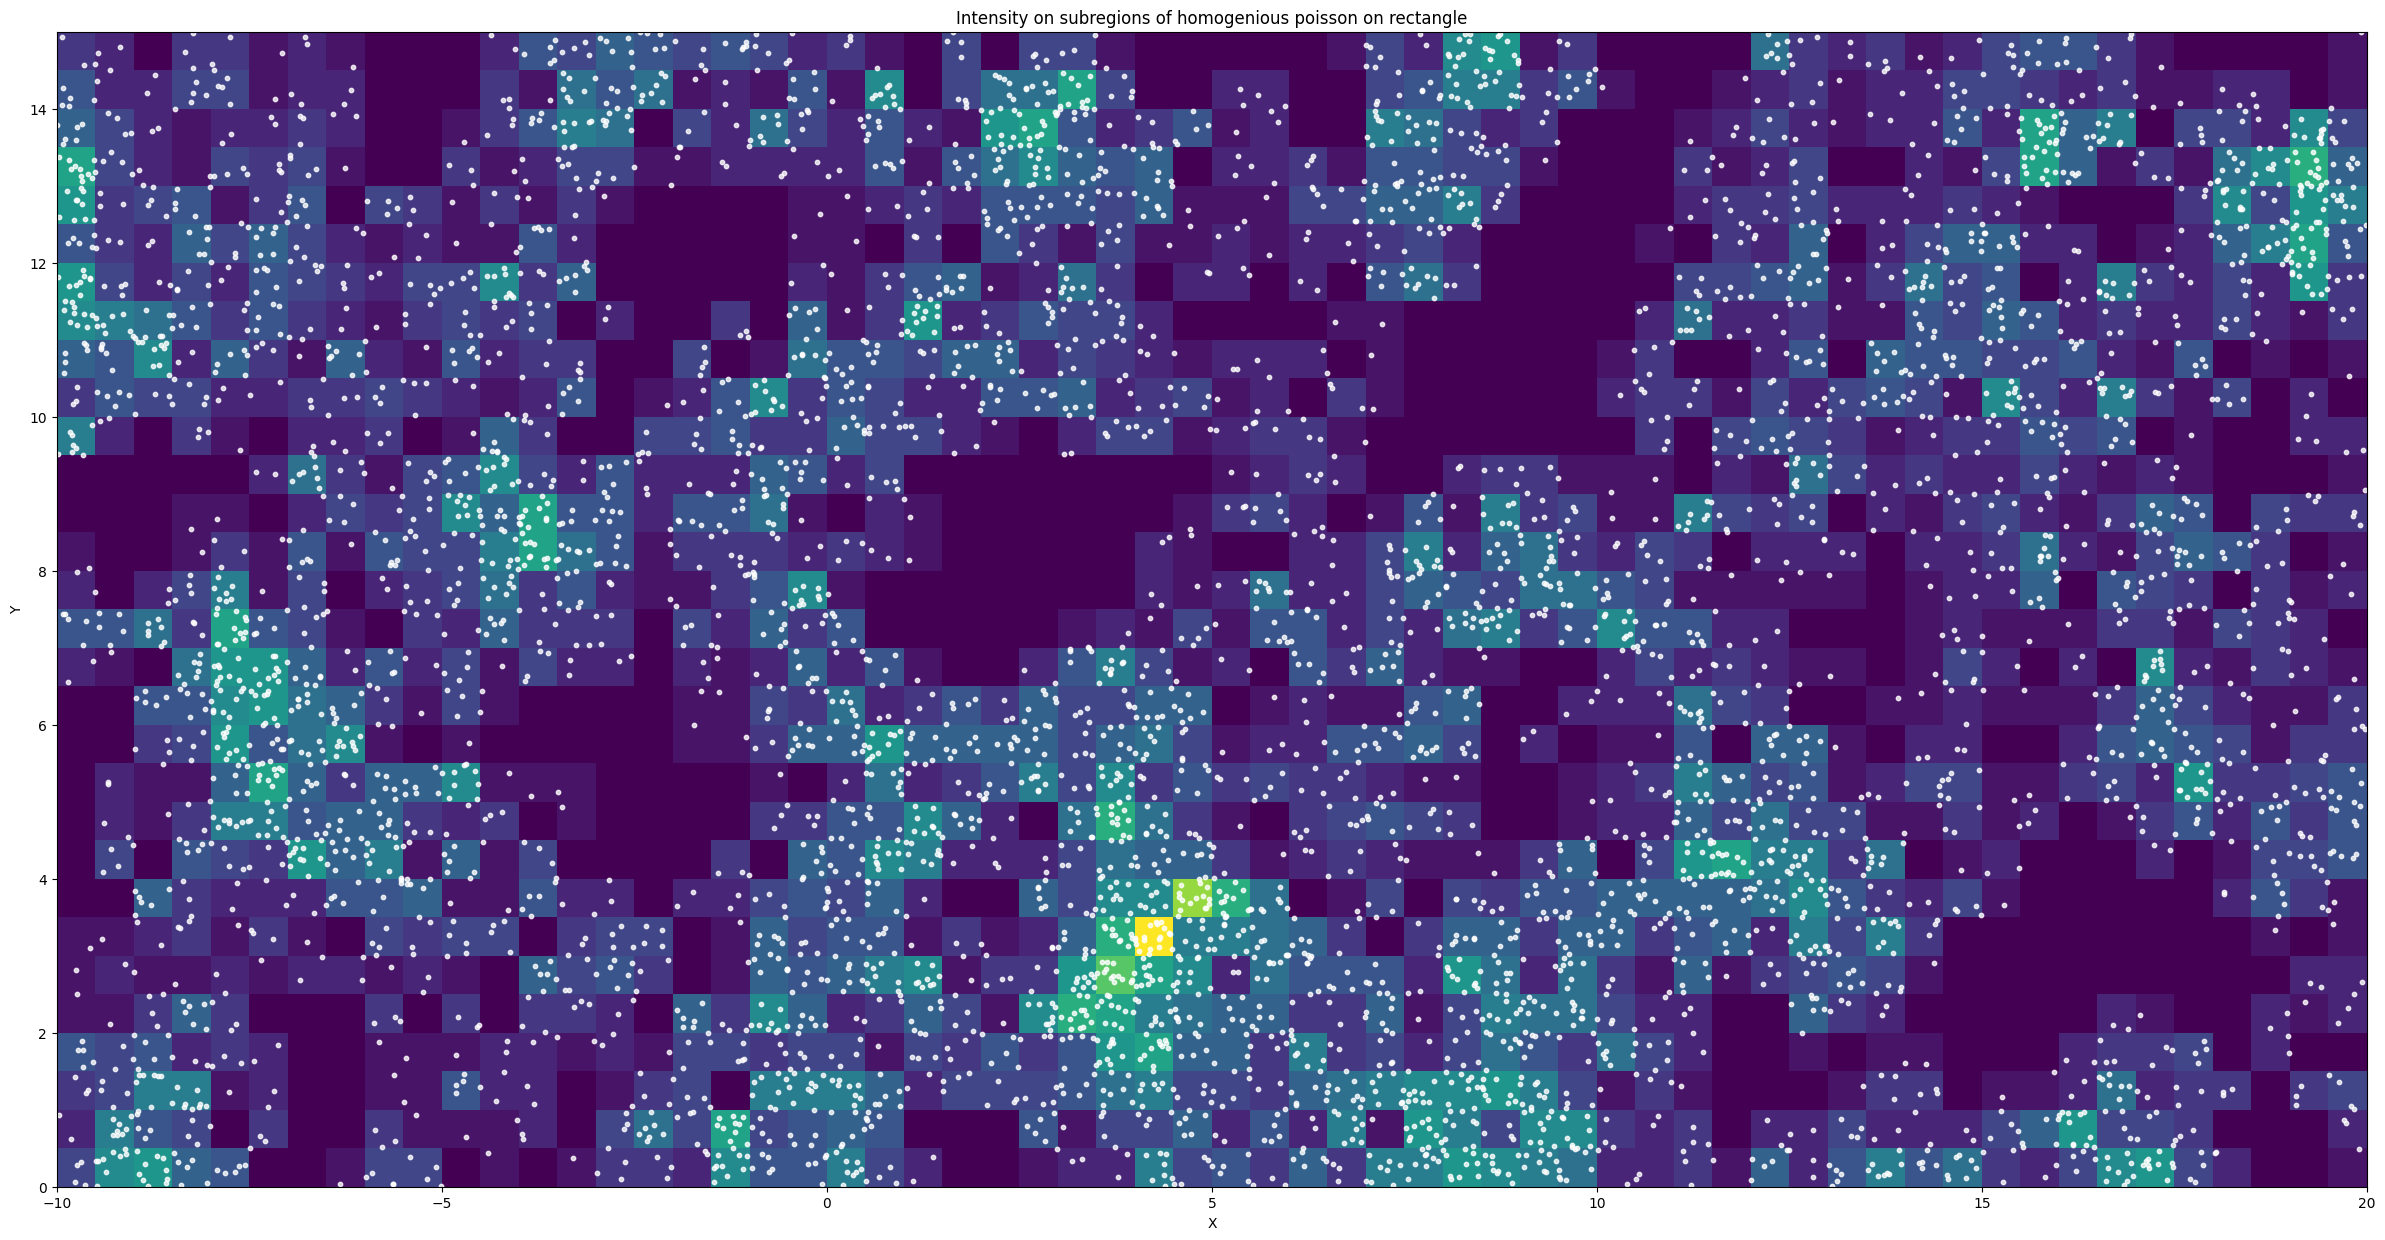

In [9]:
# YOUR CODE HERE
points1=pd.read_csv('points_1.csv')
X,Y,H = intensity_on_subregions(points1,[60,30],[-10, 20] ,[0, 15])
fig,ax=plt.subplots(1,1,figsize=(30,15))
ax.pcolormesh(X,Y,H.T, cmap="viridis")
ax.scatter(x=points1["X"], y = points1["Y"], c="white", s = 10,alpha = 0.8 )
ax.axis("square")
ax.set_title("Intensity on subregions of homogenious poisson on rectangle")
ax.set_xlim([-10, 20])
ax.set_ylim([0, 15])
ax.set_xlabel("X")
ax.set_ylabel("Y")

### Zadanie 2: Funkcja G (15 pkt)

Przygotuj funkcję `g_function()`, która będzie generować dane niezbędne do wykonania wykresu funkcji G analizowanego rozkładu punktów zgodnie ze schematem omawianym podczas ćwiczeń oraz opisem podanym w docstring funkcji.

Następnie wykorzystaj przygotowaną funkcję do analizy rozkładu punktów zawartego w pliku points_2.csv. 

Przedstaw wyniki analizy graficznie w postaci wykresu liniowego funkcji G analizowanego rozkładu punktów zestawionego z teoretyczną funkcją G jednorodnego rozkładu Poissona o intensywności identycznej z analizowanym rozkładem. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x1). Umieść analizowany rozkład punktów w górnym wierszu, a wykresy funkcji G w dolnym wierszu figury. <br/>

UWAGA! Porównywane wykresy funkcji G powinny zaczynać się od $d=0$ (co może wymagać uzupełnienia danych o 0 w obrębie funkcji `g_function()`) i kończyć na wartości $d$, dla której funkcja G analizowanego rozkładu punktów osiąga wartość 1.

#### a) Przygotowanie funkcji

In [106]:
def g_function_poisson(d, intensity):
    """
    Parameters
    -------
    d: array
        Macierz zawierająca odległości, dla których ma zostać wyznaczona wartość funkcji G.
    intensity: float
        Liczba dodatnia określająca intensywność jednorodnego procesu Poissona.
    
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
    """  
    G=1-np.exp(-intensity*np.pi*d*d).T
    return pd.DataFrame({"D":d,"G":G})

def g_function(points):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
    """   
    # YOUR CODE HERE
    d=sp.spatial.distance.cdist(points,points)
    d=np.sort(d,axis=0)
    d=np.sort(d[1,:])
    dUniq=np.unique(d)
    G=np.array([sum(d<=i) for i in dUniq])/len(d)
    d=dUniq
    d=np.insert(d,0,0)
    G=np.insert(G,0,0)
    return pd.DataFrame({"D":d,"G":G})

#### b) Generowanie i wizualizacja danych

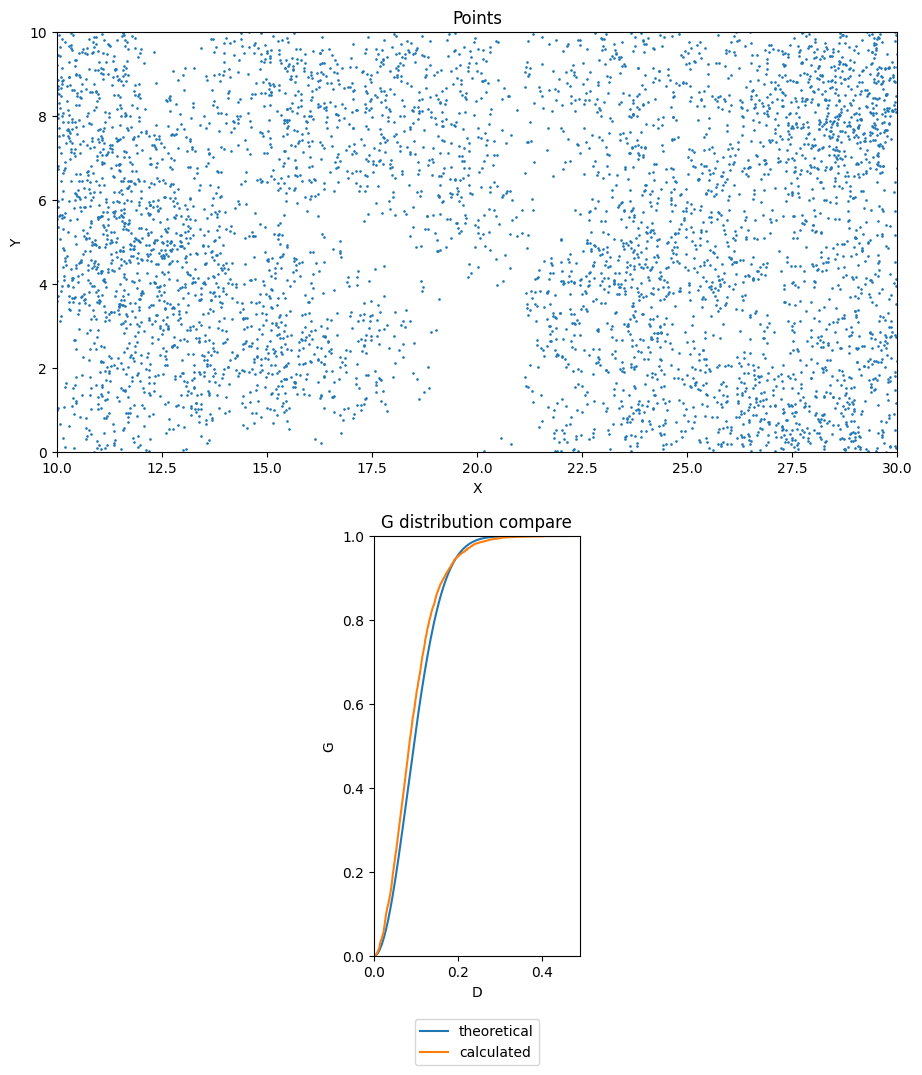

In [119]:
# YOUR CODE HERE
points2=pd.read_csv('points_2.csv')
calculated=g_function(points2)
teoretic=g_function_poisson(np.linspace(0,np.max(calculated["D"]),num=200,),len(points2)/(20*10))
fig,ax=plt.subplots(2,1,figsize=(24,12))

ax[0].grid(False)
ax[0].scatter(points2["X"],points2["Y"], s = 0.8)
ax[0].set_title("Points")
ax[0].axis("square")
ax[0].set_xlim([10,30])
ax[0].set_ylim([0,10])
ax[0].set_xlabel("X")
ax[0].set_ylabel("Y")

ax[1].grid(False)
ax[1].plot(teoretic["D"],teoretic["G"],label='theoretical')
ax[1].plot(calculated["D"],calculated["G"],label='calculated')
ax[1].set_title("G distribution compare")
ax[1].axis("square")
ax[1].set_xlim([0,np.max(calculated["D"])])
ax[1].set_ylim([0,1])
ax[1].set_xlabel("D")
ax[1].set_ylabel("G")
ax[1].legend(bbox_to_anchor=(0.5, -0.15),loc='upper center', borderaxespad=0.)

### Zadanie 3: Opóźnienie przestrzenne (11 pkt)

Przygotuj funkcję `spatial_lag()`, która będzie przygotowywać tablicę wartości opóźnienia przestrzennego zgodnie ze schematem omawianym podczas ćwiczeń oraz opisem podanym w docstring funkcji.

Następnie wykorzystaj przygotowaną funkcję do wyznaczania tablic opóźnienia przestrzennego zagragowanego rozkładu zawartego w pliku binned_data.npy. W obliczeniach wykorzystaj macierz wag przestrzennych zawartą w pliku w.npy.

Przedstaw wyniki analizy graficznie w postaci histogramu dwuwymiarowego opóźnienia przestrzennego zestawionego z histogramem dwuwymiarowym danych zagregowanych, na podstawie których zostało ono wyliczone. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x1). Umieść zagreowane dane w górnym wierszu, a opóźnienie przestrzenne w dolnym wierszu figury.

#### a) Przygotowanie funkcji

In [58]:
def spatial_lag(binned_data, w):
    """
    Parameters
    -------
    binned_data: list
        Lista zawierająca trzy macierze:
        - 1D ze współrzędnymi krawędzi podobszarów na osi X,
        - 1D ze współrzędnymi krawędzi podobszarów na osi Y,
        - 2D z liczbą punków przypisanych do każdego z podobszarów.
        Na przykład: [array([0, 1, 2]), array([0, 1, 2]), array([[7, 2], [4, 5]])]
    w: array
        Macierz wag przestrzennych

    Returns
    -------
    lagged_data: list
        Lista zawierająca trzy macierze:
        - 1D ze współrzędnymi krawędzi podobszarów na osi X,
        - 1D ze współrzędnymi krawędzi podobszarów na osi Y,
        - 2D z wyliczonymi wartościami opóźnienia przestrzennego.
        Na przykład: [array([0, 1, 2]), array([0, 1, 2]), array([[7, 2], [4, 5]])]
    """    
    # YOUR CODE HERE
    binned_data = binned_data.copy()
    LC = []
    x = binned_data[-1].flatten()
    sw = w
    for row in sw:
        LC.append(np.sum(x*row)/np.sum(row))
    binned_data[-1] = np.reshape(LC,(len(binned_data[-1]), len(binned_data[-1][0])))
    return binned_data

#### b) Wygenerowanie i wizualizacja danych 

Text(0, 0.5, 'Y')

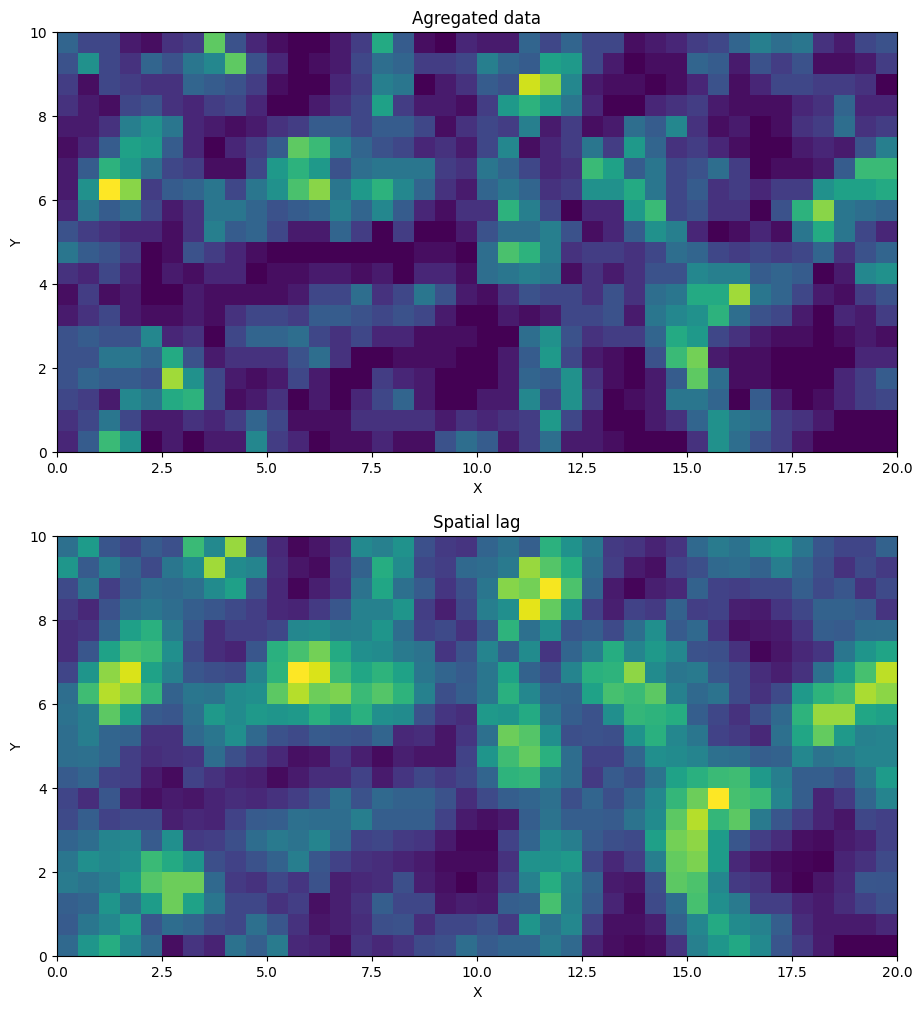

In [59]:
# YOUR CODE HERE
binned=np.load("binned_data.npy",allow_pickle=True)
w=np.load("w.npy",allow_pickle=True)
res_lag = spatial_lag(binned,w)

fig,ax=plt.subplots(2,1,figsize=(24,12))
ax[0].grid(False)
ax[0].pcolormesh(binned[0],binned[1],binned[2], cmap="viridis")
ax[0].axis("square")
ax[0].set_title("Agregated data")
ax[0].set_xlim([0,20])
ax[0].set_ylim([0,10])
ax[0].set_xlabel("X")
ax[0].set_ylabel("Y")

ax[1].grid(False)
ax[1].pcolormesh(res_lag[0],res_lag[1],res_lag[2], cmap="viridis")
ax[1].axis("square")
ax[1].set_title("Spatial lag")
ax[1].set_xlim([0,20])
ax[1].set_ylim([0,10])
ax[1].set_xlabel("X")
ax[1].set_ylabel("Y")

### Zadanie 4: Analiza danych z wykorzystaniem pakietów Geopandas i PySAL (15 pkt)
Zaimportuj do notatnika dane z plików Miejscowości.zip, Wojewodztwa.zip i Wisla.zip, a następnie na ich podstawie wykonaj następujące polecenia:
1) Odpowiedz na pytanie ile województw ma pole powierzchni większe niż 20000 km^2.
2) Odpowiedz na pytanie ile miast leży w obrębie lub nie dalej niż 30 km od granic województwa łódzkiego.
3) Zwizualizuj wyniki analizy na pojedynczym wykresie zgodnie z podanymi niżej wytycznymi.

Wizualizacja powinna zawierać:
- województwa, wypełnione jednolitym kolorem,
- miasta, w jednym z dwóch wybranych kolorów w zależności od spełnienia warunku z polecenia 2,
- rzekę, wypełnioną jednolitym kolorem, 
- oznaczenie obszaru na którym następuje spełnienie warunku z polecenia 2.

UWAGA! Polecenia należy wykonywać na danych zapisanych w odwzorowaniu kartograficznym epsg:2180.

6
113


Text(32.097222222222214, 0.5, 'Y')

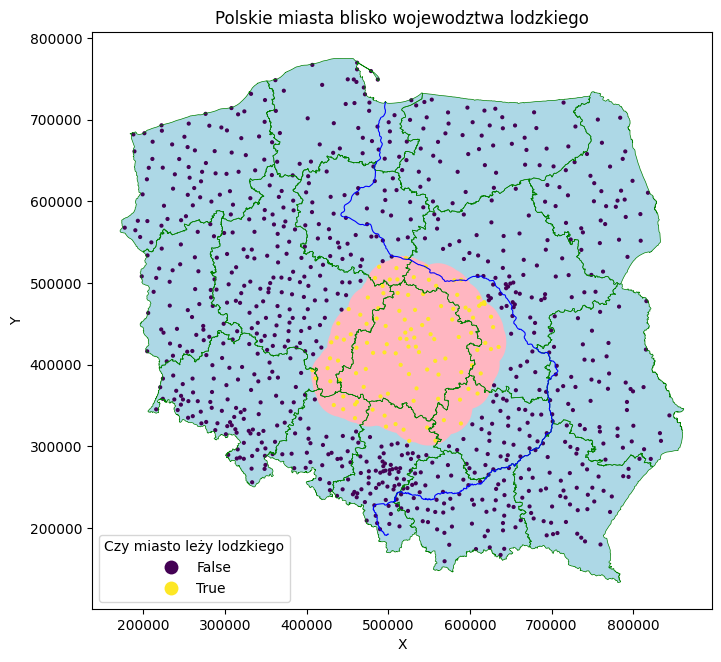

In [120]:
# YOUR CODE HERE
df_woj=gpd.read_file("Wojewodztwa.zip")
tab_woj=gpd.GeoDataFrame({'Nazwa':df_woj["JPT_NAZWA_"],'geometry':df_woj["geometry"]})

df_miej=gpd.read_file("Miejscowosci.zip")
miasta=df_miej[df_miej["rodzaj"]=='miasto']
tab_miast=gpd.GeoDataFrame({"Nazwa":miasta["nazwaGlown"],"geometry":miasta["geometry"]})

df_wisla=gpd.read_file("Wisla.zip")
tab_wisla=gpd.GeoDataFrame({"Nazwa":df_wisla["NAZ_RZEKI"],"geometry":df_wisla["geometry"]})

if tab_woj.crs!="epsg:2180":
    tab_woj = tab_woj.to_crs(2180)
if tab_miast.crs!="epsg:2180":
    tab_miast = tab_miej.to_crs(2180)
if tab_wisla.crs!="epsg:2180":
    tab_wisla = tab_wisla.to_crs(2180)

pyt1 = sum(tab_woj.area>20000000000)
print(pyt1)
obszar = tab_woj[tab_woj['Nazwa']=='łódzkie'].buffer(30000)
df = obszar
for i in range(len(tab_miast)-1):
    df = pd.concat([df,obszar])
tab_miast['Blisko lodzkiego']=tab_miast.within(df, align = False)
ile = len(tab_miast[tab_miast['Blisko lodzkiego']])
print(ile)    

fig,ax=plt.subplots(figsize=(8,9))
tab_woj.plot(ax = ax, color='lightblue')
obszar.plot(color='lightpink', ax=ax)
tab_woj.boundary.plot(color='green', ax=ax, linewidth=0.5)
tab_miast.plot(ax=ax, cmap='viridis', column = tab_miast['Blisko lodzkiego'], markersize=4, legend=True,
                        legend_kwds={'title': "Czy miasto leży lodzkiego"})
tab_wisla.plot(color='blue', ax=ax, linewidth = 0.8)
ax.set_title('Polskie miasta blisko wojewodztwa lodzkiego')
ax.set_xlabel("X")
ax.set_ylabel("Y")